# NHISS Categorization Analysis of 60 Experimentally Tested Molecules for Indocyanine Nanoparticle Formation

Number of High Intrinsic State Substructures (NHISS) is calculated as the total number of functional groups in a molecule with fluorine (-F) and double bonded oxygen (=O).

NHISS = fluorine + carbonyl + sulfinyl + 2 * sulfonyl + nitroso + 2 * nitro

In [1]:
import pandas as pd
import numpy as np
import os
import re
from __future__ import print_function, division
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Calculate NHISS descriptor
#### Import names of experimentally tested drugs and their mol files. 

In [2]:
### Creating dataframe for the list of molecules
path = "./"
filename="mol_file_list_N60.txt"
file = open(os.path.join(path, filename), "r")

filename_list = []
for line in file:
    filename_list.append(line.split('\n')[0])

print(len(filename_list))
print(filename_list[:5])

60
['ABT737.mol', 'AZD-4547.mol', 'Apitolisib.mol', 'Avagacestat.mol', 'Avasimibe.mol']


In [3]:
df_molecules = pd.DataFrame(filename_list)
df_molecules.columns= ["File Name"]
print(df_molecules.size)

df_molecules["NAME"] = None
df_molecules.head()

60


,File Name,NAME
0,ABT737.mol,None
1,AZD-4547.mol,None
2,Apitolisib.mol,None
3,Avagacestat.mol,None
4,Avasimibe.mol,None


#### Create SMILES strings for all molecules
This section requires using OpenEye OEChem library, version 2.0.5.

In [4]:
from openeye import oechem, oedepict

df_molecules["smiles"] = None

ifs = oechem.oemolistream()
ofs = oechem.oemolostream()

ifs.SetFormat(oechem.OEFormat_MOL2)
ofs.SetFormat(oechem.OEFormat_SMI)

for i, row in enumerate(df_molecules.iterrows()):
    df_molecules.ix[i,"NAME"] = re.split("[.]", df_molecules.ix[i,"File Name"])[0]
    
    file_name = df_molecules.ix[i,0]
    mol_file_path = "./mol_files_of_60_drugs/"
    this_path = os.path.join(mol_file_path, file_name)
    mol_file = ifs.open(os.path.join(this_path))
   
    for mol in ifs.GetOEGraphMols():
        #print ("Number of atoms:", mol.NumAtoms())
        #print ("Canonical isomeric SMILES:", OEMolToSmiles(mol))
        df_molecules.ix[i,"smiles"] = oechem.OEMolToSmiles(mol)
        
df_molecules.head()

,File Name,NAME,smiles
0,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...
1,AZD-4547.mol,AZD-4547,C[C@@H]1CN(C[C@@H](N1)C)c2ccc(cc2)C(=O)Nc3cc([...
2,Apitolisib.mol,Apitolisib,Cc1c(sc2c1nc(nc2N3CCOCC3)c4cnc(nc4)N)CN5CCN(CC...
3,Avagacestat.mol,Avagacestat,c1cc(ccc1S(=O)(=O)[N@@](Cc2ccc(cc2F)c3ncon3)[C...
4,Avasimibe.mol,Avasimibe,CC(C)c1cccc(c1OS(=O)(=O)NC(=O)Cc2c(cc(cc2C(C)C...


#### Counting Substructures for NHISS descriptor
This section requires using OpenEye OEChem library, version 2.0.5.

In [5]:
df_molecules.loc[:,"F"] = None
df_molecules.loc[:,"carbonyl"] = None
df_molecules.loc[:,"sulfinyl"] = None
df_molecules.loc[:,"sulfonyl"] = None
df_molecules.loc[:,"nitroso"] = None
df_molecules.loc[:,"nitro"] = None
df_molecules.head()

,File Name,NAME,smiles,F,carbonyl,sulfinyl,sulfonyl,nitroso,nitro
0,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...,None,None,None,None,None,None
1,AZD-4547.mol,AZD-4547,C[C@@H]1CN(C[C@@H](N1)C)c2ccc(cc2)C(=O)Nc3cc([...,None,None,None,None,None,None
2,Apitolisib.mol,Apitolisib,Cc1c(sc2c1nc(nc2N3CCOCC3)c4cnc(nc4)N)CN5CCN(CC...,None,None,None,None,None,None
3,Avagacestat.mol,Avagacestat,c1cc(ccc1S(=O)(=O)[N@@](Cc2ccc(cc2F)c3ncon3)[C...,None,None,None,None,None,None
4,Avasimibe.mol,Avasimibe,CC(C)c1cccc(c1OS(=O)(=O)NC(=O)Cc2c(cc(cc2C(C)C...,None,None,None,None,None,None


In [6]:
#write to csv
df_molecules.to_csv("df_molecules.csv", encoding='utf-8')

# Run the following to populate the dataframe from terminal (runs faster):
import os

%run count_carbonyls.py
%run count_fluorines.py
%run count_sulfinyls.py
%run count_sulfonyls.py
%run count_nitroso.py
%run count_nitro.py

Done.
Done.
Done.
Done
Done.
Done.


#### Import experimental data and merge

In [7]:
df_exp_data = pd.read_csv("experimental_dataset_N60.csv")
df_exp_data.head()

,NAME,SpMAX4_Bh(s),Experimental INP Formation,SpMAX4_Bh(s) Analysis Group
0,ABT737,7.00,Yes,Validation
1,Apitolisib,5.01,No,Validation
2,Avagacestat,8.00,Yes,Validation
3,Avasimibe,4.79,Yes,Validation
4,AZD-4547,4.72,No,Validation


In [8]:
# Merge DataFrames
df_molecules= pd.merge(df_molecules, df_exp_data, on=["NAME"])
print(df_molecules.size)
print(df_molecules.shape)
df_molecules.head()

708
(59, 12)


,File Name,NAME,smiles,F,carbonyl,sulfinyl,sulfonyl,nitroso,nitro,SpMAX4_Bh(s),Experimental INP Formation,SpMAX4_Bh(s) Analysis Group
0,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...,0,1,0,1,0,1,7.00,Yes,Validation
1,AZD-4547.mol,AZD-4547,C[C@@H]1CN(C[C@@H](N1)C)c2ccc(cc2)C(=O)Nc3cc([...,0,1,0,0,0,0,4.72,No,Validation
2,Apitolisib.mol,Apitolisib,Cc1c(sc2c1nc(nc2N3CCOCC3)c4cnc(nc4)N)CN5CCN(CC...,0,1,0,0,0,0,5.01,No,Validation
3,Avagacestat.mol,Avagacestat,c1cc(ccc1S(=O)(=O)[N@@](Cc2ccc(cc2F)c3ncon3)[C...,4,1,0,1,0,0,8.00,Yes,Validation
4,Avasimibe.mol,Avasimibe,CC(C)c1cccc(c1OS(=O)(=O)NC(=O)Cc2c(cc(cc2C(C)C...,0,1,0,1,0,0,4.79,Yes,Validation


#### Calculating NHISS (Number of High Instrinsic State Substructures)
NHISS descriptor is the total number of fluorines and double bonded oxygens in the structure.
$ NHISS = fluorine + carbonyl + sulfinyl + 2*sulfonyl + nitroso + 2*nitro $

In [9]:
df_molecules.loc[:,"NHISS"] = None
for i, row in enumerate(df_molecules.iterrows()):
    NHISS= df_molecules.loc[i,"F"] + df_molecules.loc[i,"carbonyl"]+ df_molecules.loc[i,"sulfinyl"] + 2*df_molecules.loc[i,"sulfonyl"] + df_molecules.loc[i,"nitroso"] + 2*df_molecules.loc[i,"nitro"]
    df_molecules.loc[i,"NHISS"]=NHISS
df_molecules.to_csv("df_molecules.csv", encoding='utf-8')
df_molecules.head()

,File Name,NAME,smiles,F,carbonyl,sulfinyl,sulfonyl,nitroso,nitro,SpMAX4_Bh(s),Experimental INP Formation,SpMAX4_Bh(s) Analysis Group,NHISS
0,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...,0,1,0,1,0,1,7.00,Yes,Validation,5
1,AZD-4547.mol,AZD-4547,C[C@@H]1CN(C[C@@H](N1)C)c2ccc(cc2)C(=O)Nc3cc([...,0,1,0,0,0,0,4.72,No,Validation,1
2,Apitolisib.mol,Apitolisib,Cc1c(sc2c1nc(nc2N3CCOCC3)c4cnc(nc4)N)CN5CCN(CC...,0,1,0,0,0,0,5.01,No,Validation,1
3,Avagacestat.mol,Avagacestat,c1cc(ccc1S(=O)(=O)[N@@](Cc2ccc(cc2F)c3ncon3)[C...,4,1,0,1,0,0,8.00,Yes,Validation,7
4,Avasimibe.mol,Avasimibe,CC(C)c1cccc(c1OS(=O)(=O)NC(=O)Cc2c(cc(cc2C(C)C...,0,1,0,1,0,0,4.79,Yes,Validation,3


### 2. NHISS vs NHISS Rank Plot

/Users/isikm/opt/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


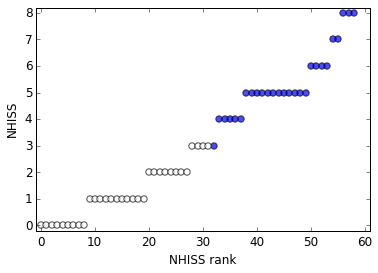

In [10]:
df_exp_sorted = df_molecules.sort_values(by="NHISS", ascending=1).reset_index(drop=True)
df_exp_sorted["NHISS rank"]=df_exp_sorted.index

df_exp_yes_sorted = df_exp_sorted.loc[df_exp_sorted["Experimental INP Formation"] == "Yes"].reset_index(drop=True)
df_exp_no_sorted = df_exp_sorted.loc[df_exp_sorted["Experimental INP Formation"] == "No"].reset_index(drop=True)

NHISS_array_yes_sorted = df_exp_yes_sorted.ix[:,"NHISS"]
NHISS_rank_array_yes_sorted = df_exp_yes_sorted.ix[:,"NHISS rank"]
NHISS_array_no_sorted = df_exp_no_sorted.ix[:,"NHISS"]
NHISS_rank_array_no_sorted = df_exp_no_sorted.ix[:,"NHISS rank"]

plt.rcParams.update({'font.size': 12})
fig = plt.figure(1, figsize=(6,4), dpi=200)

plt.scatter(NHISS_rank_array_yes_sorted, NHISS_array_yes_sorted, alpha=0.7, c="b", s=40 )
plt.scatter(NHISS_rank_array_no_sorted, NHISS_array_no_sorted, alpha=0.7,  c="w", s=40)
plt.xlabel("NHISS rank")
plt.ylabel("NHISS")
plt.xlim(-1,61)
plt.ylim(-0.2,8.2)
plt.savefig("NHISS_rank.png", dpi=200)
plt.savefig("NHISS_rank.svg")
#plt.gcf().canvas.get_supported_filetypes()

### 3. NHISS Box Plot

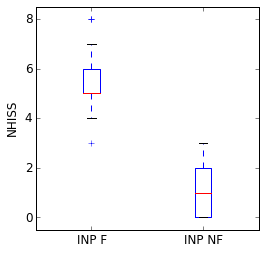

In [11]:
NHISS_array_yes = df_exp_yes_sorted.ix[:,"NHISS"].astype(float)
NHISS_array_no = df_exp_no_sorted.ix[:,"NHISS"].astype(float)

data=[NHISS_array_yes, NHISS_array_no]

fig=plt.figure(1, figsize=(4,4))
ax= fig.add_subplot(111)

ax.boxplot(data)
ax.set_xticklabels(["INP F","INP NF"])
ax.set_ylabel("NHISS")
ax.set_ylim(-0.5, 8.5)
fig.savefig("NHISS_boxplot.png", dpi=200)
plt.savefig("NHISS_boxplot.svg")

In [12]:
from scipy import stats
print(stats.ttest_ind(NHISS_array_yes, NHISS_array_no, equal_var=False))
import numpy as np, statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(NHISS_array_yes), sms.DescrStatsW(NHISS_array_no))
print("95% CI: ", cm.tconfint_diff(usevar='unequal'))

Ttest_indResult(statistic=13.482224363456757, pvalue=5.1329904511696059e-18)
95% CI:  (3.5326264662501035, 4.7706142744906366)


### 4. NHISS Logistic Regression

In [13]:
from scipy import optimize

def logistic(params,x):
    """ 
    Logistic function

    Parameters
    ----------
    params : list or numpy array
      the three parameters of the logistic function
      First parameter is set to 1 to make the function
      span 0 to 1.
    x : numpy array
      the explanatory variable
   
    Return
    ------
    numpy array
      the output of the logistic function

    """
    params[0]=1
    return params[0]/(1+np.exp(-x*params[1] - params[2])) 

def residuals(params):
    predicted = logistic(params,x)
    return np.sum((y-predicted)**2)

In [14]:
df_molecules["Experimental Category"]=None

for i,row in enumerate(df_molecules.iterrows()):
    if df_molecules.ix[i,"Experimental INP Formation"] == "Yes" :
        df_molecules.ix[i, "Experimental Category"] = 1
    else:
        df_molecules.ix[i, "Experimental Category"] = 0

df_molecules.head()

,File Name,NAME,smiles,F,carbonyl,sulfinyl,sulfonyl,nitroso,nitro,SpMAX4_Bh(s),Experimental INP Formation,SpMAX4_Bh(s) Analysis Group,NHISS,Experimental Category
0,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...,0,1,0,1,0,1,7.00,Yes,Validation,5,1
1,AZD-4547.mol,AZD-4547,C[C@@H]1CN(C[C@@H](N1)C)c2ccc(cc2)C(=O)Nc3cc([...,0,1,0,0,0,0,4.72,No,Validation,1,0
2,Apitolisib.mol,Apitolisib,Cc1c(sc2c1nc(nc2N3CCOCC3)c4cnc(nc4)N)CN5CCN(CC...,0,1,0,0,0,0,5.01,No,Validation,1,0
3,Avagacestat.mol,Avagacestat,c1cc(ccc1S(=O)(=O)[N@@](Cc2ccc(cc2F)c3ncon3)[C...,4,1,0,1,0,0,8.00,Yes,Validation,7,1
4,Avasimibe.mol,Avasimibe,CC(C)c1cccc(c1OS(=O)(=O)NC(=O)Cc2c(cc(cc2C(C)C...,0,1,0,1,0,0,4.79,Yes,Validation,3,1


The predicted parameters are  [  1.          19.57045985 -60.09767392]
Threshold NHISS:  3.07083606511


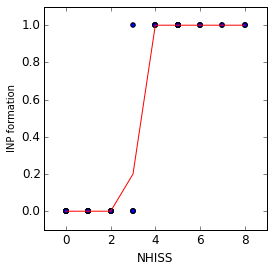

In [15]:
fig = plt.figure(1, figsize=(4,4))

df_sorted = df_molecules.sort_values(by="NHISS", ascending=1).reset_index(drop=True)
initial_guess = [1,1,1]
x=df_sorted.ix[:, "NHISS"].astype(float)
y=df_sorted.ix[:, "Experimental Category"]

fit = optimize.minimize(residuals, initial_guess, method='Nelder-Mead')
print("The predicted parameters are ", fit.x)

# Inflection point is -x_0/b
threshold =(-1)*fit.x[2]/fit.x[1]
print("Threshold NHISS: ", threshold)
    
plt.scatter(x,y)
predicted = logistic(fit.x, x)
plt.plot(x, predicted,color="red")
plt.xlabel('NHISS')
plt.ylabel('INP formation', size=10)
plt.ylim(-0.1, 1.1)
plt.savefig("NHISS_logistic_fit.png", dpi=200)
plt.savefig("NHISS_logistic_fit.svg")

### 5. NHISS ROC Curve

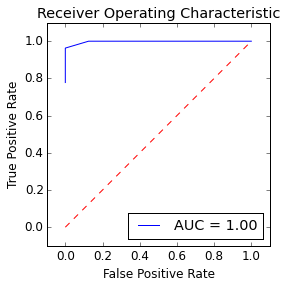

In [16]:
from sklearn import metrics

y_actual = df_sorted["Experimental Category"]
# predicted score come from logistic regression
y_predicted = predicted

# ROC
fpr, tpr, thresholds = metrics.roc_curve(y_actual, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC curve
fig = plt.figure(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("NHISS_ROC.svg")

In [17]:
print("TPR:", tpr)
print("FPR:", fpr)
print("Treshold:", thresholds)

TPR: [ 0.77777778  0.96296296  1.          1.          1.          1.        ]
FPR: [ 0.       0.       0.125    0.375    0.71875  1.     ]
Treshold: [  1.00000000e+00   9.99999987e-01   1.99999999e-01   7.91766795e-10
   2.50757865e-18   7.94167012e-27]


#### Bootstrap for ROC AUC confidence intervals

Original ROC area: 0.998
95% Confidence interval for the score: [0.991 - 1.0]


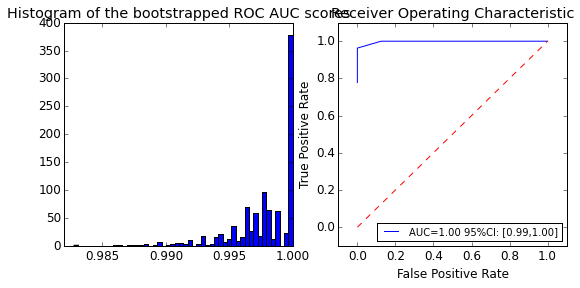

In [18]:
y_actual = np.array(y_actual).astype(int)
y_predicted = np.array(y_predicted)
print("Original ROC area: {:0.3f}".format(metrics.roc_auc_score(y_actual, y_predicted)))

n_bootstraps = 1000
rng_seed = 0  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):

    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.random_integers(0, len(y_predicted) - 1, len(y_predicted))
 
    if len(np.unique(y_actual[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = metrics.roc_auc_score(y_actual[indices], y_predicted[indices])
    bootstrapped_scores.append(score)
    #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

fig = plt.figure(1, figsize=(9,4))
plt.subplot(1,2,1)
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC scores')
# plt.show()

sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 95% confidence interval
# 95% CI percentiles to 0.025 and 0.975
confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
print("95% Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

# Plotting ROC curve
#fig = plt.figure(1, figsize=(4,4))
plt.subplot(1,2,2)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC={0:0.2f} 95%CI: [{1:0.2f},{2:0.2f}]'.format(roc_auc, confidence_lower, confidence_upper))
plt.legend(loc='lower right', prop={'size':10})
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("NHISS_ROC_with_histogram.png", dpi=200)
plt.savefig("NHISS_ROC_with_histogram.svg")

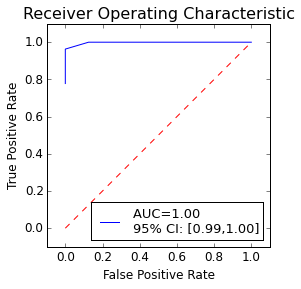

In [19]:
# Plotting ROC curve
fig = plt.figure(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic', size=16)
plt.plot(fpr, tpr, 'b', label='AUC={0:0.2f} \n95% CI: [{1:0.2f},{2:0.2f}]'.format(roc_auc, confidence_lower, confidence_upper))
plt.legend(loc='lower right', prop={'size':13})
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("NHISS_ROC.png", dpi=200)
plt.savefig("NHISS_ROC.svg")

### 6. NHISS Confusion Matrix
Threshold for confusion matrix was determined by inflection point of logistic regression.

In [20]:
df_molecules["Pred Category by NHISS"]= None
    
for i, row in enumerate(df_molecules.iterrows()):
    logP = float(df_molecules.ix[i, "NHISS"])
    #print(logD)
    if logP < threshold:
        df_molecules.ix[i, "Pred Category by NHISS"] = 0
    else:
        df_molecules.ix[i, "Pred Category by NHISS"] = 1
df_molecules.head()

,File Name,NAME,smiles,F,carbonyl,sulfinyl,sulfonyl,nitroso,nitro,SpMAX4_Bh(s),Experimental INP Formation,SpMAX4_Bh(s) Analysis Group,NHISS,Experimental Category,Pred Category by NHISS
0,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...,0,1,0,1,0,1,7.00,Yes,Validation,5,1,1
1,AZD-4547.mol,AZD-4547,C[C@@H]1CN(C[C@@H](N1)C)c2ccc(cc2)C(=O)Nc3cc([...,0,1,0,0,0,0,4.72,No,Validation,1,0,0
2,Apitolisib.mol,Apitolisib,Cc1c(sc2c1nc(nc2N3CCOCC3)c4cnc(nc4)N)CN5CCN(CC...,0,1,0,0,0,0,5.01,No,Validation,1,0,0
3,Avagacestat.mol,Avagacestat,c1cc(ccc1S(=O)(=O)[N@@](Cc2ccc(cc2F)c3ncon3)[C...,4,1,0,1,0,0,8.00,Yes,Validation,7,1,1
4,Avasimibe.mol,Avasimibe,CC(C)c1cccc(c1OS(=O)(=O)NC(=O)Cc2c(cc(cc2C(C)C...,0,1,0,1,0,0,4.79,Yes,Validation,3,1,0


In [21]:
exp_NP = df_molecules.ix[:,"Experimental Category"].astype(int)
pred_NP = df_molecules.ix[:, "Pred Category by NHISS"].astype(int)

actual = pd.Series(exp_NP, name= "Actual")
predicted = pd.Series(pred_NP, name= "Predicted")
df_confusion = pd.crosstab(actual, predicted)
    
# Accuracy = (TP+TN)/(TP+TN+FP+FN)
TP = df_confusion.ix[1,1]
TN = df_confusion.ix[0,0]
FP = df_confusion.ix[0,1]
FN = df_confusion.ix[1,0]
    
accuracy = (TP+TN)/(TP+TN+FP+FN)
    
print("NHISS", "\nAccuracy= {:.2f}".format(accuracy))
print("NHISS threshold= {:.2f}\n".format(threshold)) 
print(df_confusion)

NHISS 
Accuracy= 0.98
NHISS threshold= 3.07

Predicted   0   1
Actual           
0          32   0
1           1  26
